<a href="https://colab.research.google.com/github/NeuralClassifier/OutlierDetect/blob/main/Local_Global_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import zipfile
import os
import shutil
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [2]:
!git clone https://github.com/NeuralClassifier/OutlierDetect

Cloning into 'OutlierDetect'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (342/342), done.
remote: Compressing objects: 100% (297/297), done.
remote: Total 342 (delta 83), reused 241 (delta 41), pack-reused 0
Receiving objects: 100% (342/342), 317.46 MiB | 20.55 MiB/s, done.
Resolving deltas: 100% (83/83), done.
Checking out files: 100% (211/211), done.


In [9]:
def unzipFile(file_name, exctraction_place):
  with zipfile.ZipFile(file_name,"r") as zip_ref:
      zip_ref.extractall(exctraction_place)
def removeFolder(file_path):
  try:
    shutil.rmtree(file_path)
  except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [26]:
unzipFile('50p.zip','/content/')

In [47]:
df = pd.read_excel('/content/50p/3/50p_m3_dim2.xlsx')
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df

,A1,A2,Y
0,4.764052,3.400157,0
1,3.978738,5.240893,0
2,4.867558,2.022722,0
3,3.950088,2.848643,0
4,2.896781,3.410599,0
...,...,...,...
295,1.589356,0.621304,1
296,0.576898,0.248450,1
297,-0.657871,0.049916,1
298,-0.758972,-0.798942,1


In [48]:
(max(X[:, 0])+1)*(-1)

-4.383144774863942

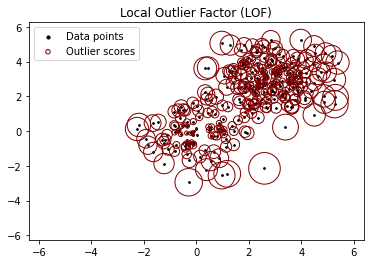

In [63]:
X = np.array(df.iloc[:,:-1])
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
#n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
plt.axis("tight")
plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
#plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [69]:
df_lofnorm=pd.concat([df,pd.DataFrame(radius,columns=['normalized_LOF'])],axis=1)
df_lofnorm

,A1,A2,Y,normalized_LOF
0,4.764052,3.400157,0,0.339236
1,3.978738,5.240893,0,0.462651
2,4.867558,2.022722,0,0.502330
3,3.950088,2.848643,0,0.036278
4,2.896781,3.410599,0,0.038868
...,...,...,...,...
295,1.589356,0.621304,1,0.081684
296,0.576898,0.248450,1,0.036413
297,-0.657871,0.049916,1,0.016231
298,-0.758972,-0.798942,1,0.047704


In [70]:
df_lofnorm.sort_values(["normalized_LOF"], ascending=False)

,A1,A2,Y,normalized_LOF
281,2.597200,-2.145322,1,1.000000
245,-0.292389,-2.946143,1,0.754493
12,5.269755,1.545634,0,0.741607
223,0.962596,-2.555619,1,0.722988
237,1.178197,-2.459185,1,0.716127
...,...,...,...,...
263,-0.348165,-0.549338,1,0.004852
234,-0.102897,-0.009883,1,0.003017
290,-0.001697,0.119279,1,0.001952
294,0.041413,-0.217543,1,0.001237


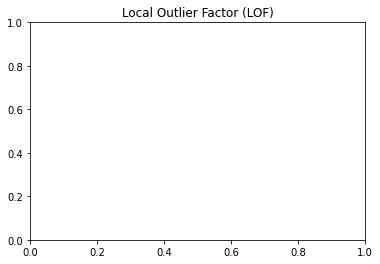

In [7]:
#LOF

red = [30,50,70,90]
p70 = [1,2,3,4]
redPath = '/content/OutlierDetect/Data/reduced_synthetic_data/'

#path_reduced = "/content/"+str(self.reduction)+'p'
#os.mkdir(path_reduced)
#path = "/content/"+str(self.reduction)+'p'+"/outlierScore_perData/"
#os.mkdir(path)

for folders in red:
  subfold = redPath+str(folders)+'p/'
  p70 = [1,2,3,4]
  for subsub in p70:
    subfold = redPath+str(folders)+'p/'
    subfold = subfold+str(subsub)+'/'
    path = subfold+'/LOF/'
    os.mkdir(path)
    dim = [2, 10, 20, 40, 80, 100]
    for files in dim:
      filename = subfold+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'.xlsx'
      df = pd.read_excel(filename)
      X = np.array(df.iloc[:,:-1])
      clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
      y_pred = clf.fit_predict(X)
      X_scores = clf.negative_outlier_factor_
      #plt.title("Local Outlier Factor (LOF)")
      #plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
      # plot circles with radius proportional to the outlier scores
      radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
      #plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
      #plt.axis("tight")
      #plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
      #plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
      #plt.xlabel("prediction errors: %d" % (n_errors))
      #legend = plt.legend(loc="upper left")
      #legend.legendHandles[0]._sizes = [10]
      #legend.legendHandles[1]._sizes = [20]
      #plt.show()
      df_lofnorm=pd.concat([df,pd.DataFrame(radius,columns=['normalized_LOF'])],axis=1)
      df_lofnorm.to_excel(path+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'_LOF.xlsx')

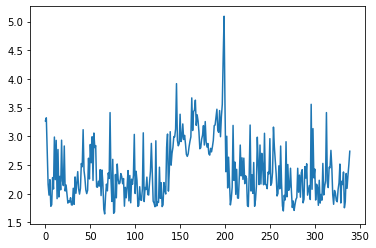

Enter threshold: 3
(array([  0,   1,  42,  54,  72,  99, 109, 136, 139, 145, 146, 150, 153,
       155, 163, 164, 165, 166, 167, 168, 169, 170, 171, 175, 176, 178,
       188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 202,
       209, 228, 244, 254, 296, 298, 313]),)


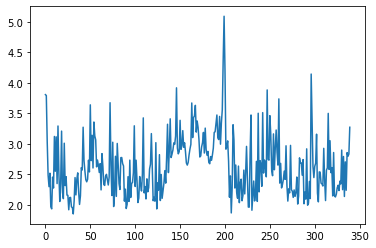

Enter threshold: 3
(array([  0,   1,   2,  10,  12,  14,  18,  21,  42,  50,  52,  54,  55,
        56,  72,  75,  80,  99, 109, 118, 123, 136, 139, 143, 145, 146,
       150, 153, 155, 163, 164, 165, 166, 167, 168, 169, 170, 171, 175,
       176, 178, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199,
       200, 203, 209, 210, 229, 237, 242, 247, 250, 251, 254, 257, 260,
       296, 297, 302, 315, 317, 339]),)


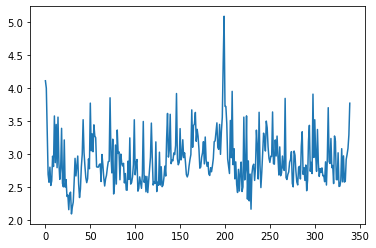

Enter threshold: 3.5
(array([  0,   1,  10,  14,  42,  50,  72,  99, 136, 139, 146, 163, 167,
       197, 198, 199, 200, 201, 206, 208, 221, 224, 238, 253, 267, 298,
       300, 315, 339]),)


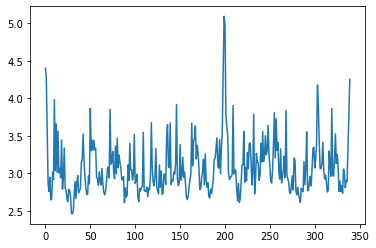

KeyboardInterrupt: ignored

In [21]:
#KNN

red = [30,50,70,90]
p70 = [1,2,3,4]
redPath = '/content/OutlierDetect/Data/reduced_synthetic_data/'

#path_reduced = "/content/"+str(self.reduction)+'p'
#os.mkdir(path_reduced)
#path = "/content/"+str(self.reduction)+'p'+"/outlierScore_perData/"
#os.mkdir(path)

for folders in red:
  subfold = redPath+str(folders)+'p/'
  p70 = [1,2,3,4]
  for subsub in p70:
    subfold = redPath+str(folders)+'p/'
    subfold = subfold+str(subsub)+'/'
    path = subfold+'/LOF/'
    #os.mkdir(path)
    dim = [2, 10, 20, 40, 80, 100]
    for files in dim:
      filename = subfold+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'.xlsx'
      df = pd.read_excel(filename)
      X = np.array(df.iloc[:,:-1])

      # instantiate model
      nbrs = NearestNeighbors(n_neighbors = 10)
      # fit model
      nbrs.fit(X)
      # distances and indexes of k-neighbors from model outputs
      distances, indexes = nbrs.kneighbors(X)
      #print(distances)
      #print(list(indexes))
  
      # plot mean of k-distances of each observation
      plt.plot(distances.mean(axis =1))
      plt.show()
      # visually determine cutoff values > 0.15
      thres = float(input('Enter threshold: '))
      outlier_index = np.where(distances.mean(axis = 1) > thres)
      print(outlier_index)
      break

      #clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
      #y_pred = clf.fit_predict(X)
      #X_scores = clf.negative_outlier_factor_
      #plt.title("Local Outlier Factor (LOF)")
      #plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
      # plot circles with radius proportional to the outlier scores
      #radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
      #plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="maroon",facecolors="none",label="Outlier scores",)
      #plt.axis("tight")
      #plt.xlim(((max(X[:, 0])+1)*(-1), max(X[:, 0])+1))
      #plt.ylim(((max(X[:, 1])+1)*(-1), max(X[:, 1])+1))
      #plt.xlabel("prediction errors: %d" % (n_errors))
      #legend = plt.legend(loc="upper left")
      #legend.legendHandles[0]._sizes = [10]
      #legend.legendHandles[1]._sizes = [20]
      #plt.show()
      #df_lofnorm=pd.concat([df,pd.DataFrame(radius,columns=['normalized_LOF'])],axis=1)
      #df_lofnorm.to_excel(path+str(folders)+'p'+'_m'+str(subsub)+'_dim'+str(files)+'_LOF.xlsx')

In [9]:
!zip -r /content/reduced_synthetic_data.zip . i /content/reduced_synthetic_data

	zip warning: name not matched: i
	zip warning: name not matched: /content/reduced_synthetic_data
  adding: .config/ (stored 0%)
  adding: .config/active_config (stored 0%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2021.12.03/ (stored 0%)
  adding: .config/logs/2021.12.03/14.33.16.964195.log (deflated 54%)
  adding: .config/logs/2021.12.03/14.32.30.027140.log (deflated 91%)
  adding: .config/logs/2021.12.03/14.33.36.903459.log (deflated 54%)
  adding: .config/logs/2021.12.03/14.33.09.955489.log (deflated 86%)
  adding: .config/logs/2021.12.03/14.32.50.522723.log (deflated 53%)
  adding: .config/logs/2021.12.03/14.33.37.701606.log (deflated 53%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/gce (stored 0%)
  adding: .config/.last_update_check.json (deflated 24%)
  adding: .config/.last_opt_i

In [10]:
removeFolder('/content/70p')